In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
df = pd.read_csv('placement.csv')

In [14]:
df.head()

,city,cgpa,iq,placement
0,Chicago,2.13,345.0,0
1,New York,6.80,123.0,1
2,Los Angeles,5.90,106.0,0
3,Chicago,NaN,121.0,0
4,New York,7.40,132.0,1


In [15]:
df['iq'].skew()

np.float64(0.4585213020212548)

In [16]:
df['iq'].describe()

count     97.000000
mean     120.257732
std       52.053514
min        1.000000
25%       90.000000
50%      123.000000
75%      149.000000
max      345.000000
Name: iq, dtype: float64

<Axes: ylabel='iq'>

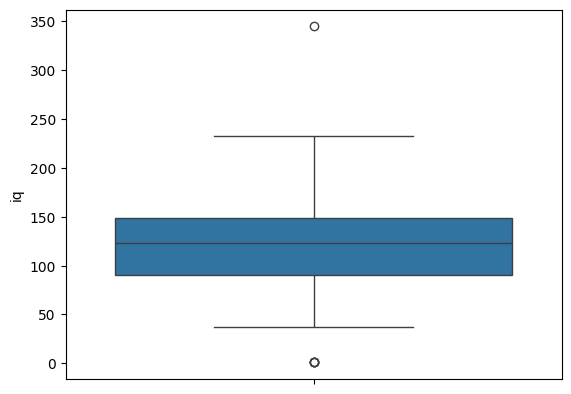

In [ ]:
sb.boxplot(df['iq'])

In [18]:
#finding IQR
per25 = df['iq'].quantile(0.25)
per75 = df['iq'].quantile(0.75)

In [19]:
iqr = per75 -per25
print(iqr)

59.0


In [20]:
upplimit = per75 + 1.5 * iqr
lowerlimit = per25 + 1.5 * iqr

In [22]:
print(upplimit)
print(lowerlimit)

237.5
178.5


In [24]:
df[df['iq']> upplimit]

,city,cgpa,iq,placement
0,Chicago,2.13,345.0,0


In [25]:
# Trimming 
newdf = df[df['iq'] < upplimit]

In [26]:
newdf.shape

(96, 4)

<Axes: ylabel='iq'>

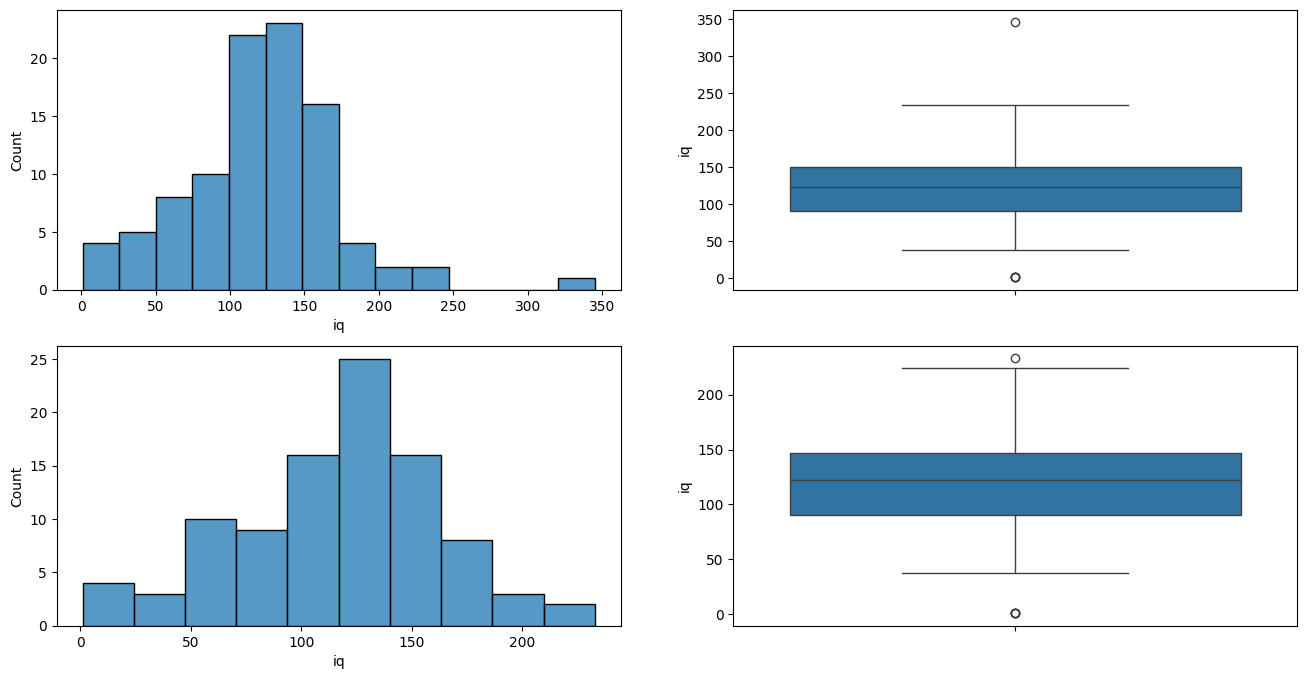

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.histplot(df['iq'])

plt.subplot(2,2,2)
sb.boxplot(df['iq'])

plt.subplot(2,2,3)
sb.histplot(newdf['iq'])


plt.subplot(2,2,4)
sb.boxplot(newdf['iq'])



#### Capping

In [32]:
nwdfcap = df.copy()

In [33]:
nwdfcap['iq'] = np.where(nwdfcap['iq'] > upplimit,upplimit,np.where(nwdfcap['iq'] < lowerlimit,lowerlimit,nwdfcap['iq']))

In [34]:
nwdfcap.shape

(101, 4)

<Axes: ylabel='iq'>

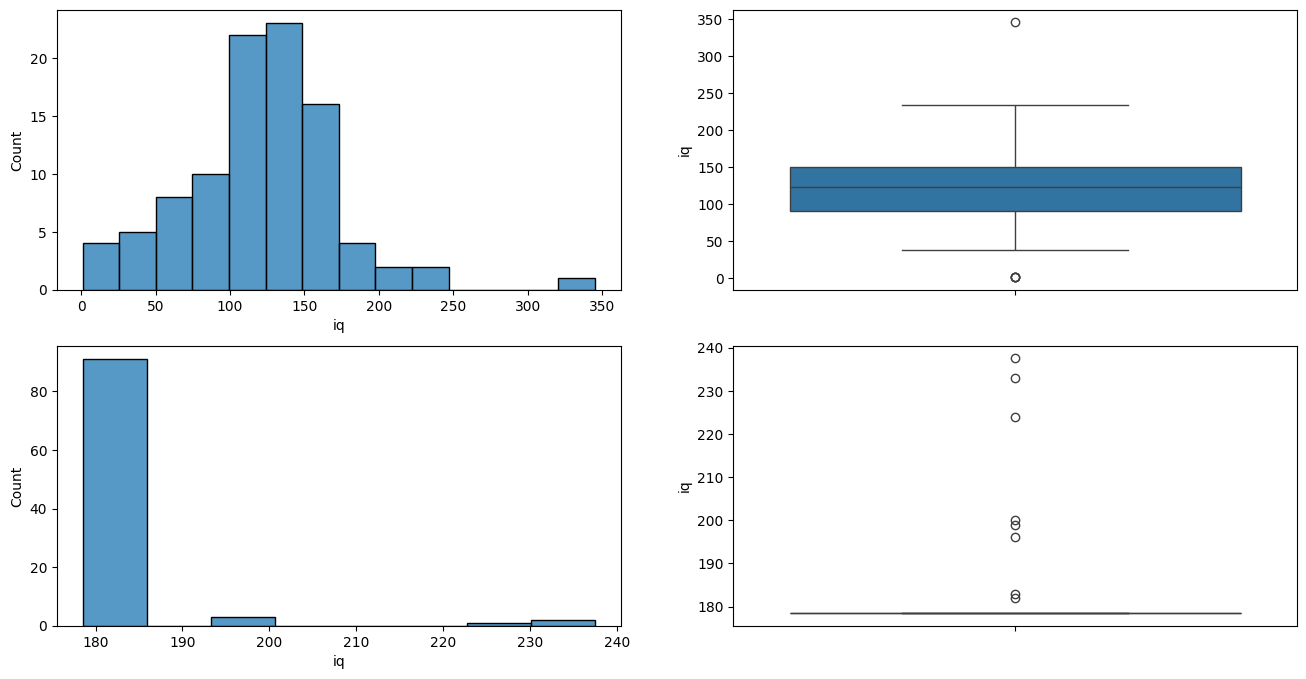

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.histplot(df['iq'])

plt.subplot(2,2,2)
sb.boxplot(df['iq'])


plt.subplot(2,2,3)
sb.histplot(nwdfcap['iq'])


plt.subplot(2,2,4)
sb.boxplot(nwdfcap['iq'])